In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

# 1. Данные
> Приведение лога в удобный вид. 

In [40]:
df = pd.read_csv('google_log.csv.zip', sep='\t', compression='zip')
df['totals.transactionRevenue'] = df['totals.transactionRevenue']/10**6
print(df.shape)
df.head()

/var/folders/dm/xbk6wzbj2d5bx3mplysddgww0000gq/T/ipykernel_58199/1038429505.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
,  df = pd.read_csv('google_log.csv.zip', sep='\t', compression='zip')


(903653, 24)


,date,fullVisitorId,sessionId,channelGrouping,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.subContinent,...,totals.pageviews,totals.transactionRevenue,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
0,20160902,1131660440785968503,1131660440785968503_1472830385,Organic Search,1472830385,Chrome,Windows,False,desktop,Western Asia,...,1.0,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN
1,20160902,377306020877927890,377306020877927890_1472880147,Organic Search,1472880147,Firefox,Macintosh,False,desktop,Australasia,...,1.0,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN
2,20160902,3895546263509774583,3895546263509774583_1472865386,Organic Search,1472865386,Chrome,Windows,False,desktop,Southern Europe,...,1.0,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN
3,20160902,4763447161404445595,4763447161404445595_1472881213,Organic Search,1472881213,UC Browser,Linux,False,desktop,Southeast Asia,...,1.0,NaN,google,organic,google + online,NaN,NaN,NaN,NaN,NaN
4,20160902,27294437909732085,27294437909732085_1472822600,Organic Search,1472822600,Chrome,Android,True,mobile,Northern Europe,...,1.0,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN


In [6]:
100*df.isnull().sum()/df.shape[0]

date                                             0.000000
fullVisitorId                                    0.000000
sessionId                                        0.000000
channelGrouping                                  0.000000
visitStartTime                                   0.000000
device.browser                                   0.000000
device.operatingSystem                           0.000000
device.isMobile                                  0.000000
device.deviceCategory                            0.000000
geoNetwork.subContinent                          0.000000
geoNetwork.country                               0.000000
geoNetwork.region                                0.000000
geoNetwork.city                                  0.000000
totals.hits                                      0.000000
totals.pageviews                                 0.011066
totals.transactionRevenue                       98.725728
trafficSource.source                             0.000000
trafficSource.

Описательные статистики. 

In [8]:
df.describe()

,date,visitStartTime,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.adwordsClickInfo.page
count,9.036530e+05,9.036530e+05,903653.000000,903553.000000,11515.000000,21460.000000
mean,2.016589e+07,1.485007e+09,4.596538,3.849764,133.744789,1.008108
std,4.697698e+03,9.022124e+06,9.641437,7.025274,448.285227,0.173584
min,2.016080e+07,1.470035e+09,1.000000,1.000000,0.010000,1.000000
25%,2.016103e+07,1.477561e+09,1.000000,1.000000,24.930000,1.000000
50%,2.017011e+07,1.483949e+09,2.000000,1.000000,49.450000,1.000000
75%,2.017042e+07,1.492759e+09,4.000000,4.000000,107.655000,1.000000
max,2.017080e+07,1.501657e+09,500.000000,469.000000,23129.500000,14.000000


In [9]:
df.describe(include='object')

,fullVisitorId,sessionId,channelGrouping,device.browser,device.operatingSystem,device.deviceCategory,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.city,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
count,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,400724,21460,21460,21460,10946
unique,731421,902755,8,54,20,3,23,222,376,649,380,7,3659,2,2,1,44
top,1957458976293878100,14108533830165900_1482391162,Organic Search,Chrome,Windows,desktop,Northern America,United States,not available in demo dataset,not available in demo dataset,google,organic,(not provided),Google Search,Top,False,Google Merchandise Collection
freq,252,2,381561,620364,350072,664479,390657,364744,508229,508229,400788,381561,366363,21453,20956,21460,5122


Заведём несколько переменных со временем. 

In [10]:
df["date"].dtype

dtype('int64')

In [11]:
df['date'][:10]

0    20160902
1    20160902
2    20160902
3    20160902
4    20160902
5    20160902
6    20160902
7    20160902
8    20160902
9    20160902
Name: date, dtype: int64

In [41]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["date"][:10]

0   2016-09-02
1   2016-09-02
2   2016-09-02
3   2016-09-02
4   2016-09-02
5   2016-09-02
6   2016-09-02
7   2016-09-02
8   2016-09-02
9   2016-09-02
Name: date, dtype: datetime64[ns]

In [42]:
df['month'] = df['date'].apply(lambda w: w.strftime('%Y-%m'))
df['month'][:10]

0    2016-09
1    2016-09
2    2016-09
3    2016-09
4    2016-09
5    2016-09
6    2016-09
7    2016-09
8    2016-09
9    2016-09
Name: month, dtype: object

In [43]:
df["visitDay"] = df['date'].dt.day
df["visitDay"][:10]

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: visitDay, dtype: int32

In [44]:
df["visitDay"] = df['date'].dt.day             # день визита
df["visitMonth"] = df['date'].dt.month         # месяц визита

df["visitWeekday"] = df['date'].dt.weekday     # выходные
df["visitWeeknum"] = df['date'].dt.isocalendar().week  # порядковый номер недели в году

# начало и конец месяца
df["is_month_start"] = df['date'].dt.is_month_start
df["is_month_end"] = df['date'].dt.is_month_end

In [25]:
df['visitStartTime'][:10]

0    1472830385
1    1472880147
2    1472865386
3    1472881213
4    1472822600
5    1472807194
6    1472817241
7    1472812602
8    1472805784
9    1472812272
Name: visitStartTime, dtype: int64

In [26]:
from datetime import datetime
datetime.fromtimestamp(1472812272).minute

31

In [45]:
df['visitHour'] = (df['visitStartTime'].apply(
    lambda x: datetime.fromtimestamp(x).hour))

df['ts'] = df['visitStartTime'].apply(
    lambda x: pd.to_datetime(x, unit='s'))

# 2. Возвращаемость и посещаемость   


In [29]:
df.head()

,date,fullVisitorId,sessionId,channelGrouping,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.subContinent,...,trafficSource.adContent,month,visitDay,visitMonth,visitWeekday,is_month_start,is_month_end,visitWeeknum,visitHour,ts
0,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Organic Search,1472830385,Chrome,Windows,False,desktop,Western Asia,...,NaN,2016-09,2,9,4,False,False,35,18,2016-09-02 15:33:05
1,2016-09-02,377306020877927890,377306020877927890_1472880147,Organic Search,1472880147,Firefox,Macintosh,False,desktop,Australasia,...,NaN,2016-09,2,9,4,False,False,35,8,2016-09-03 05:22:27
2,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Organic Search,1472865386,Chrome,Windows,False,desktop,Southern Europe,...,NaN,2016-09,2,9,4,False,False,35,4,2016-09-03 01:16:26
3,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Organic Search,1472881213,UC Browser,Linux,False,desktop,Southeast Asia,...,NaN,2016-09,2,9,4,False,False,35,8,2016-09-03 05:40:13
4,2016-09-02,27294437909732085,27294437909732085_1472822600,Organic Search,1472822600,Chrome,Android,True,mobile,Northern Europe,...,NaN,2016-09,2,9,4,False,False,35,16,2016-09-02 13:23:20


## 2.1 Сколько людей пользуются магазином в день/месяц?

In [30]:
df_day = (
    df.groupby('date')
    .agg({'fullVisitorId': 'nunique'})
    .sort_values('date')
)

df_day.head()

,fullVisitorId
date,
2016-08-01,1569
2016-08-02,1961
2016-08-03,2657
2016-08-04,2947
2016-08-05,2492


Среднее число посетителей в день: 2282.8169398907103


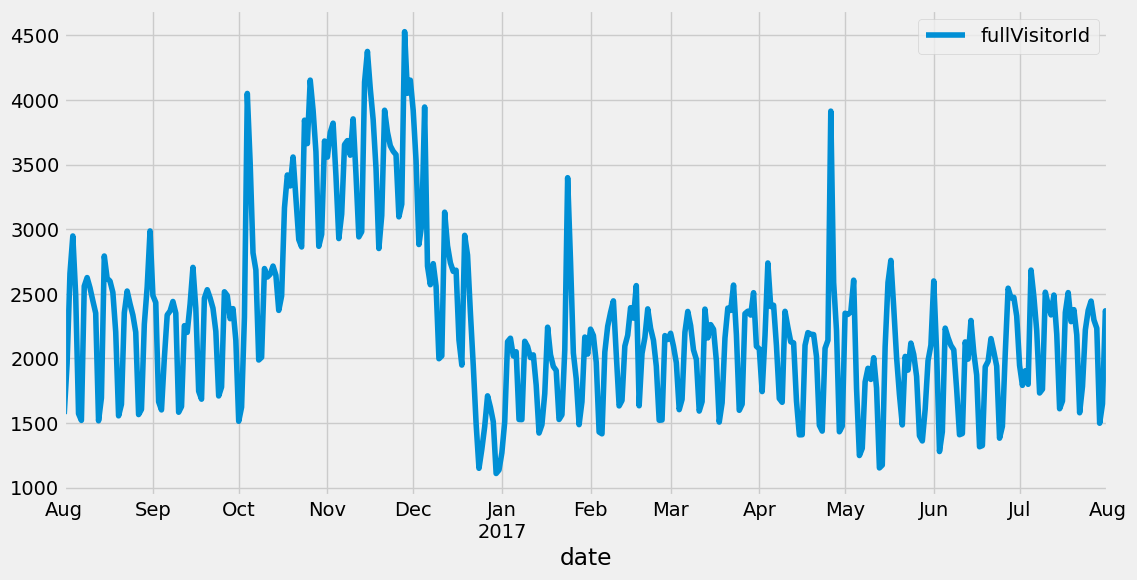

In [31]:
print(f"Среднее число посетителей в день: {df_day.fullVisitorId.mean()}")
df_day.plot(figsize=(12,6));

Среднее число посетителей в месяц: 58884.692307692305


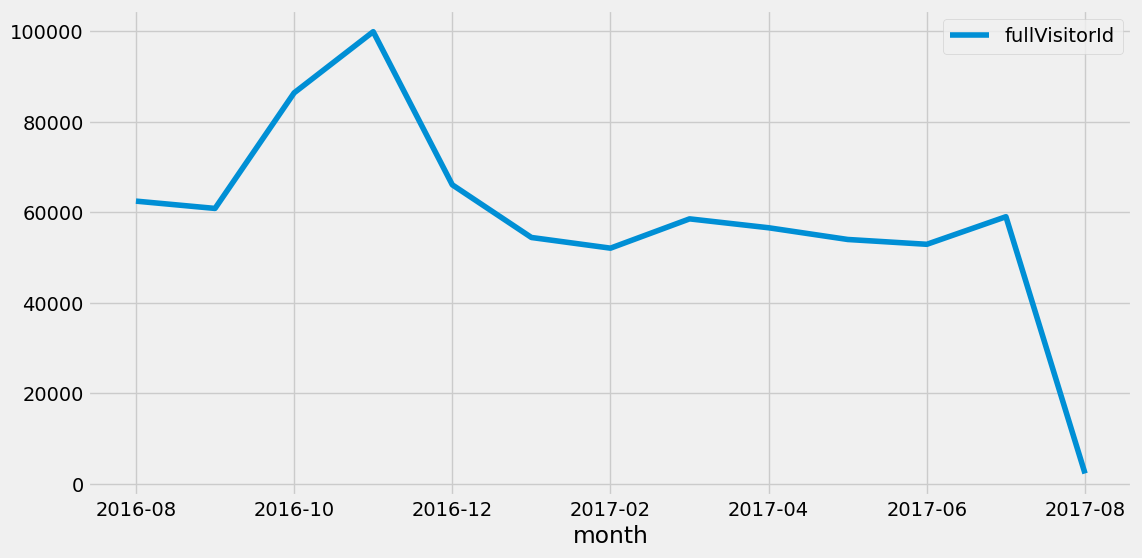

In [32]:
df_month = (
    df.groupby('month')
    .agg({'fullVisitorId': 'nunique'})
    .sort_values('month')
)

print(f"Среднее число посетителей в месяц: {df_month.fullVisitorId.mean()}")
df_month.plot(figsize=(12,6));